In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from pprint import pprint
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/bank-additional-full.csv", sep=';')
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# check for missing values in any column
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


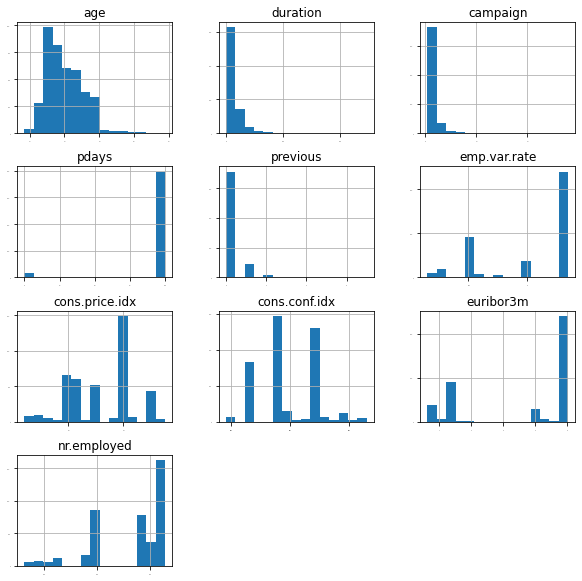

In [6]:
dataset.hist(bins = 15, figsize = (10,10), xlabelsize = 0.1, ylabelsize = 0.1)
plt.show()

In [7]:
dataset.pdays.value_counts(normalize=True)

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
19     0.000073
22     0.000073
21     0.000049
20     0.000024
25     0.000024
26     0.000024
27     0.000024
Name: pdays, dtype: float64

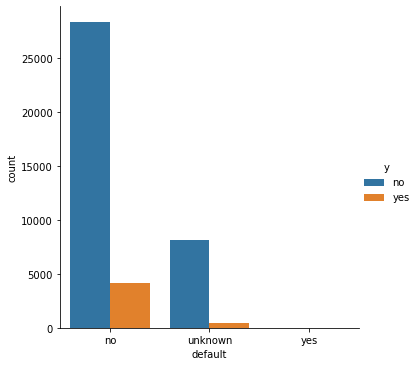

In [8]:
sns.catplot(x='default',hue='y',kind='count',data=dataset)

In [9]:
pd.crosstab(dataset['default'], dataset.y)

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


In [10]:
dataset.y.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Deposit Distributions \n (0: No || 1: Yes)')

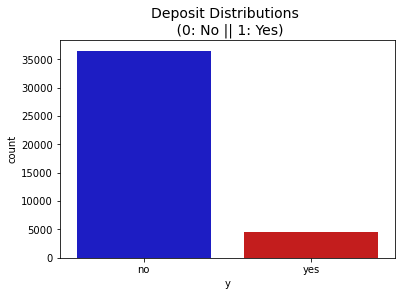

In [11]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('y', data=dataset, palette=colors)
plt.title('Deposit Distributions \n (0: No || 1: Yes)', fontsize=14)

<AxesSubplot:>

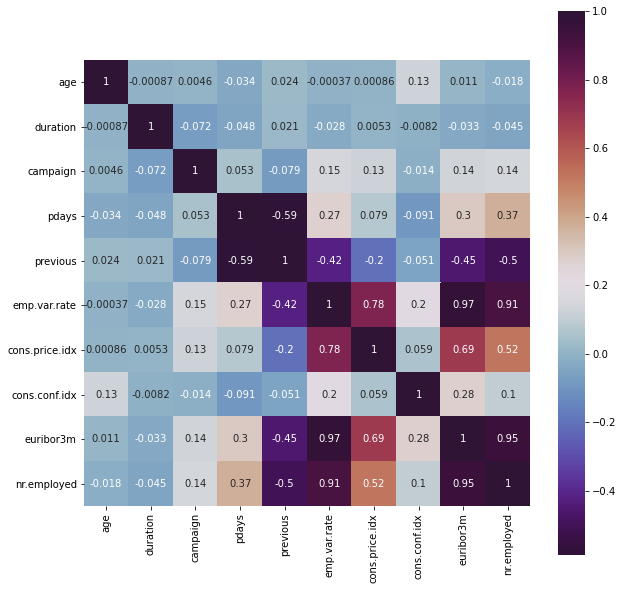

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),square=True,annot=True,cmap= 'twilight_shifted')

In [13]:
# make a copy of dataset to scaling
bank_scale=dataset.copy()

# remove 'pdays' and 'default' columns
bank_scale= bank_scale.drop(['pdays', 'default'], axis=1)

bank_scale.y.replace(('yes', 'no'), (1, 0), inplace=True)

# standardization for just numerical variables 
categorical_cols= ['job','marital', 'education',  'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','y']
feature_scale=[feature for feature in bank_scale.columns if feature not in categorical_cols]

scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [14]:
scaled_data = pd.concat([bank_scale[categorical_cols].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)

categorical_cols1= ['job','marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']
scaled_data= pd.get_dummies(scaled_data, columns = categorical_cols1, drop_first=True)
scaled_data.head()

,y,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,1.533034,0.010471,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
1,0,1.628993,-0.421501,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
2,0,-0.290186,-0.124520,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
3,0,-0.002309,-0.413787,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
4,0,1.533034,0.187888,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0


In [15]:
X = scaled_data.iloc[:,1:]
Y = scaled_data.iloc[:,-0]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Tuning parameter for RF ( tuning parameters are choosen based on best parameters of RandomizedSearchCV)
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
min_samples_split = [5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
tuning_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
tuning_rf.fit(X_train,y_train)
print('Best Parameter for Random Forest', tuning_rf.best_params_, tuning_rf.best_score_)

# Tuning parameter for Tree
param_dict= {"criterion": ['gini', 'entropy'],
            "max_depth": range(1,10),
            "min_samples_split": range(1,10),
            "min_samples_leaf": range(1,5)}
tuning_tree = GridSearchCV(DecisionTreeClassifier(random_state=12),  param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
tuning_tree.fit(X_train,y_train)
print('Best Parameter for Tree', tuning_tree.best_params_, tuning_tree.best_score_)

# Xgboost Parameters
param_xgb = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6],
 'gamma':[i/10.0 for i in range(0,5)]
}
tuning_xgb = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_xgb, scoring='roc_auc',n_jobs=4, cv=5)
tuning_xgb.fit(X_train,y_train)
print('Best Parameter for XGBoost', tuning_xgb.best_params_, tuning_xgb.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


Best Parameter for Random Forest {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45} 0.9449966338221873
Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 3020 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3772 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4872 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 6172 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:  4.1min finished


Best Parameter for Tree {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 9} 0.9155417018944977
